In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 

In [8]:
df_train=pd.read_parquet('C:/Users/Ifakir/mini projet_2 securite/data/UNSW_NB15_training-set.parquet')
df_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.093750,1.803636e+08,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000000,8.810000e+08,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.000000,8.544000e+08,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.656250,6.000000e+08,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.000000,8.504000e+08,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,udp,-,INT,2,0,104,0,200000.000000,8.320000e+07,...,0,0,1,1,0,0,0,0,Normal,0
82328,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,1.241044e+05,...,0,0,1,1,0,0,0,0,Normal,0
82329,0.000000,arp,-,INT,1,0,46,0,0.000000,0.000000e+00,...,0,0,1,1,0,0,0,1,Normal,0
82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0.000000e+00,...,0,0,1,1,0,0,0,1,Normal,0


In [9]:
df_test=pd.read_parquet('C:/Users/Ifakir/mini projet_2 securite/data/UNSW_NB15_testing-set.parquet')
df_test

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,1.415894e+04,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8.395112e+03,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1.572272e+03,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2.740179e+03,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8.561499e+03,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


In [10]:
df = pd.concat([df_train, df_test], ignore_index=True)
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.093750,1.803636e+08,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000000,8.810000e+08,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.000000,8.544000e+08,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.656250,6.000000e+08,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.000000,8.504000e+08,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


In [11]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')

In [12]:
df["label"].value_counts()

1    164673
0     93000
Name: label, dtype: int64

In [13]:
df = df.drop(df[df['label'] == 1].index[:71673])
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.093750,1.803636e+08,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000000,8.810000e+08,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.000000,8.544000e+08,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.656250,6.000000e+08,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.000000,8.504000e+08,...,0,0,2,1,0,0,0,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
257669,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
257670,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
257671,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1


In [14]:
df['label'].value_counts()

0    93000
1    93000
Name: label, dtype: int64

In [15]:
df.isnull().sum().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186000 entries, 0 to 257672
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                186000 non-null  float32 
 1   proto              186000 non-null  object  
 2   service            186000 non-null  category
 3   state              186000 non-null  object  
 4   spkts              186000 non-null  int16   
 5   dpkts              186000 non-null  int16   
 6   sbytes             186000 non-null  int32   
 7   dbytes             186000 non-null  int32   
 8   rate               186000 non-null  float32 
 9   sload              186000 non-null  float32 
 10  dload              186000 non-null  float32 
 11  sloss              186000 non-null  int16   
 12  dloss              186000 non-null  int16   
 13  sinpkt             186000 non-null  float32 
 14  dinpkt             186000 non-null  float32 
 15  sjit               186000 non-null

In [17]:
df['attack_cat'].unique()

['Normal', 'DoS', 'Shellcode', 'Exploits', 'Fuzzers', 'Reconnaissance', 'Backdoor', 'Analysis', 'Worms', 'Generic']
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [18]:
df=df.drop(['attack_cat'],axis=1)

In [19]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))

cate_cols

['proto', 'state', 'service']

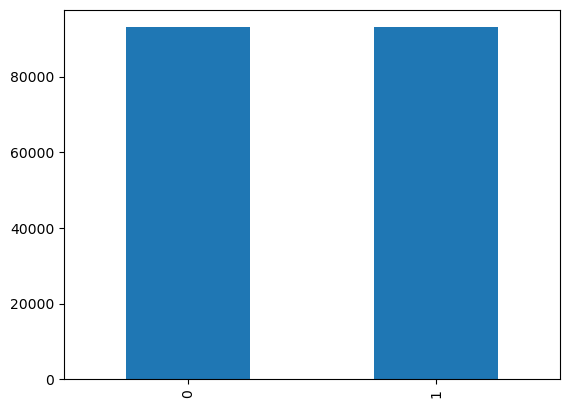

In [20]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('label')

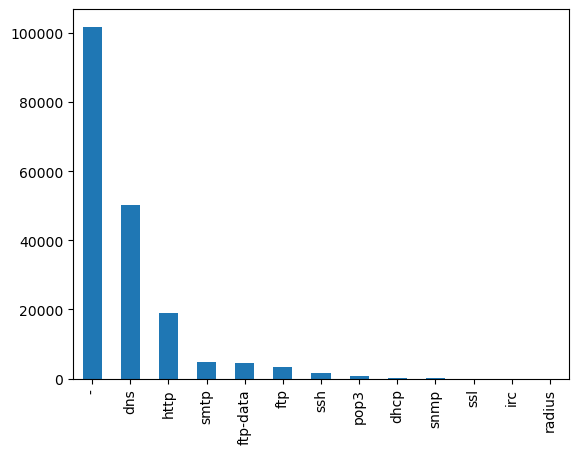

In [21]:
bar_graph('service')

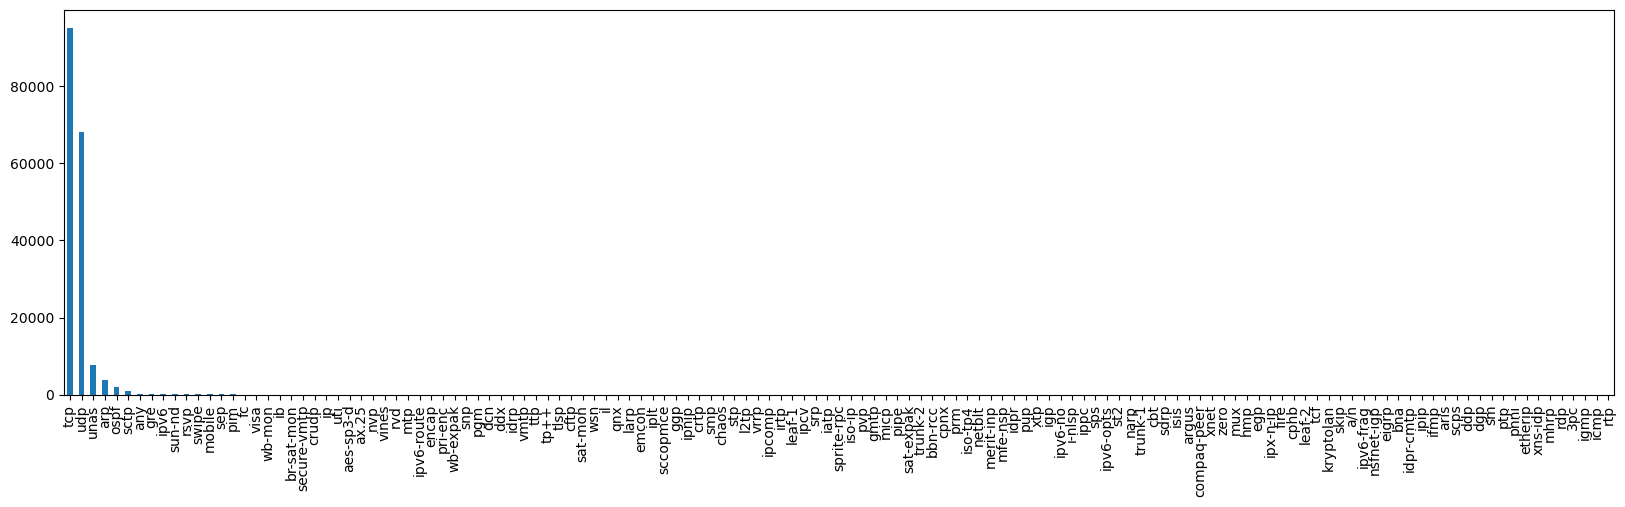

In [22]:
plt.figure(figsize=(20,5))
bar_graph('proto')

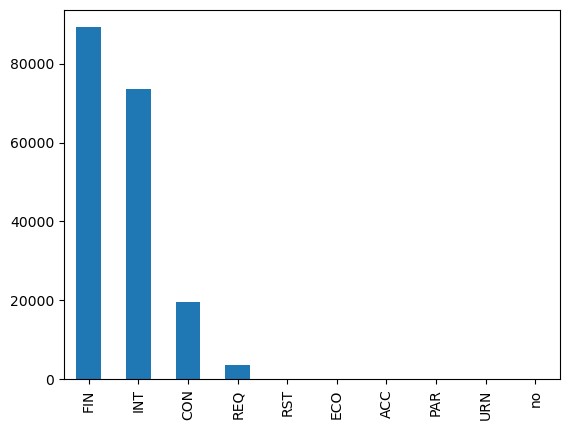

In [23]:
bar_graph('state')

In [24]:
from sklearn import preprocessing as pr
le=pr.LabelEncoder()
df['service']=le.fit_transform(df['service'])
df['proto']=le.fit_transform(df['proto'])
df['state']=le.fit_transform(df['state'])

print(df['service'])
print(df['proto'])
print(df['state'])

0         0
1         0
2         0
3         0
4         0
         ..
257668    2
257669    0
257670    2
257671    2
257672    2
Name: service, Length: 186000, dtype: int32
0         119
1         119
2         119
3         119
4         119
         ... 
257668    119
257669    113
257670    119
257671    119
257672    119
Name: proto, Length: 186000, dtype: int32
0         4
1         4
2         4
3         4
4         4
         ..
257668    4
257669    3
257670    4
257671    4
257672    4
Name: state, Length: 186000, dtype: int32


In [25]:
# df['sload'] contient vos valeurs en virgule flottante

# Formater les valeurs de la colonne "sload" avec 2 décimales et convertir en chaînes de caractères
df['sload'] = df['sload'].apply(lambda x: '{:.2f}'.format(x))

# Afficher le DataFrame avec la colonne "sload" formatée
df

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
0,0.000011,119,0,4,2,0,496,0,90909.093750,180363632.00,...,0,0,0,1,1,0,0,0,0,0
1,0.000008,119,0,4,2,0,1762,0,125000.000000,881000000.00,...,0,0,0,1,1,0,0,0,0,0
2,0.000005,119,0,4,2,0,1068,0,200000.000000,854400000.00,...,0,0,0,1,1,0,0,0,0,0
3,0.000006,119,0,4,2,0,900,0,166666.656250,600000000.00,...,0,0,0,2,1,0,0,0,0,0
4,0.000010,119,0,4,2,0,2126,0,100000.000000,850400000.00,...,0,0,0,2,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,0.000009,119,2,4,2,0,114,0,111111.109375,50666664.00,...,0,0,0,24,13,0,0,0,0,1
257669,0.505762,113,0,3,10,8,620,354,33.612648,8826.29,...,44,0,0,1,1,0,0,0,0,1
257670,0.000009,119,2,4,2,0,114,0,111111.109375,50666664.00,...,0,0,0,3,3,0,0,0,0,1
257671,0.000009,119,2,4,2,0,114,0,111111.109375,50666664.00,...,0,0,0,30,14,0,0,0,0,1


C:\Users\Ifakir\AppData\Local\Temp\ipykernel_14280\615073083.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


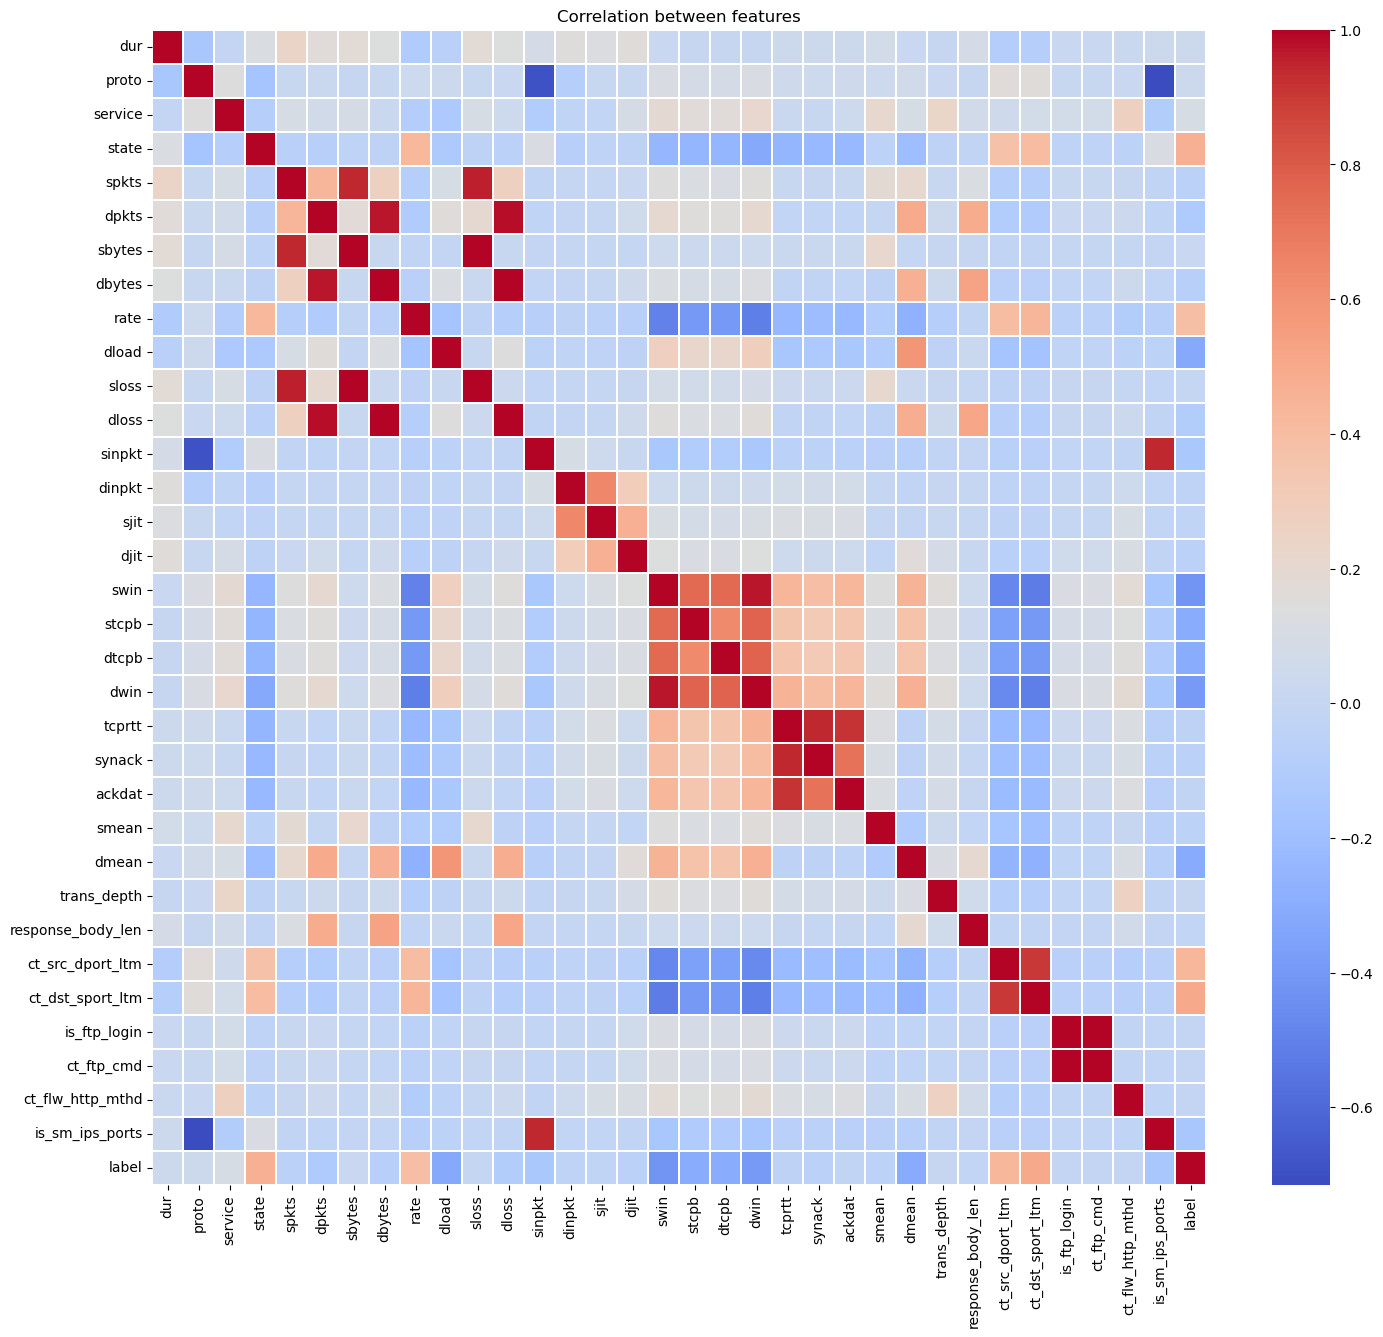

In [26]:
df = df[[col for col in df if df[col].nunique() > 1]]
corr = df.corr()
fig, ax = plt.subplots(figsize=(17, 15))
sns.heatmap(corr, cmap='coolwarm', ax=ax, linewidths=0.1)
plt.title("Correlation between features")
plt.show()

C:\Users\Ifakir\AppData\Local\Temp\ipykernel_14280\3123372525.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation entre les attributes et le attack')

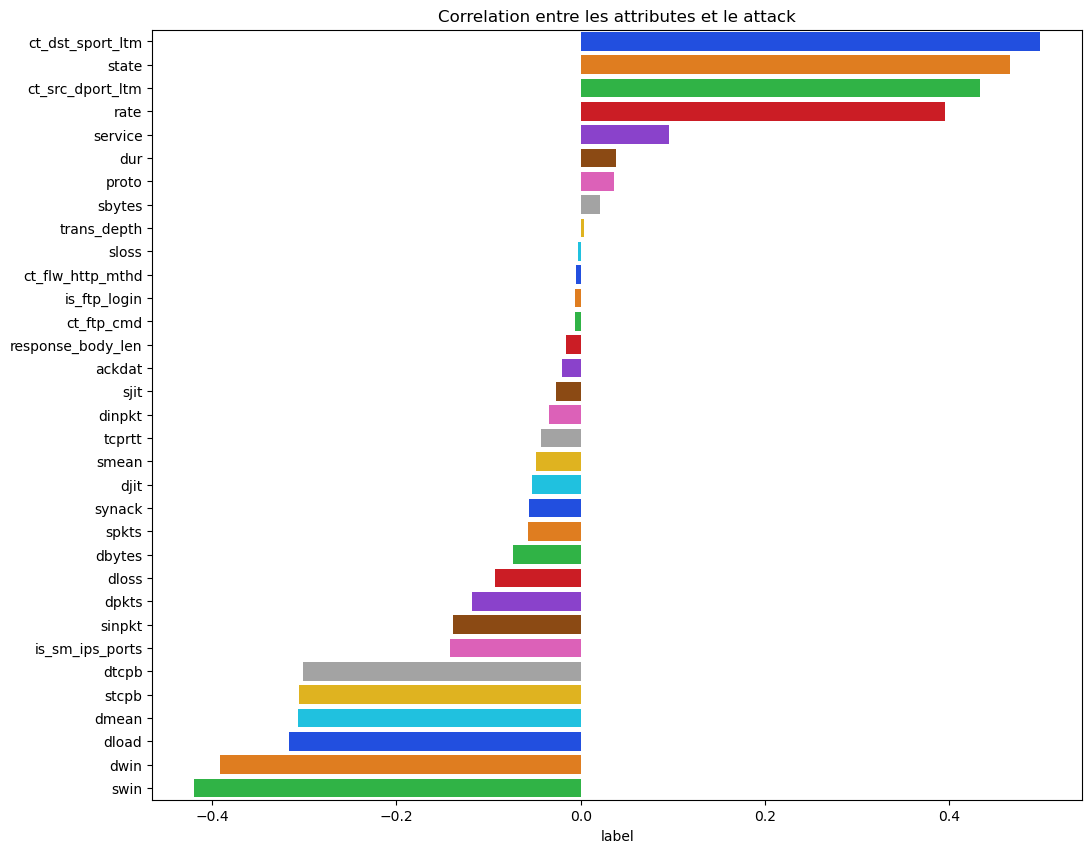

In [27]:
plt.figure(figsize=(12, 10))
corr = df.corr()
corr = corr.label
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation entre les attributes et le attack")

In [28]:
X = df.drop('label', axis=1)
y=df['label']

In [29]:
#,n_features_to_select=10
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier())
rfe.fit(X,y)

for i,col in zip(range(X.shape[1]),X.columns):
    f"{col}  selected={rfe.support_[i]} rank={rfe.ranking_[i]}"

    f=X.loc[:,rfe.support_]
f.columns

Index(['sbytes', 'dbytes', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'ct_src_dport_ltm', 'ct_dst_sport_ltm'],
      dtype='object')

In [30]:
selected_columns = ['sbytes', 'dbytes', 'rate', 'sload', 'dload', 'sinpkt', 'dinpkt',
       'djit', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'ct_src_dport_ltm', 'ct_dst_sport_ltm','label']

# Créer un nouveau DataFrame avec seulement les colonnes sélectionnées
df = df[selected_columns]

# Afficher les premières lignes du nouveau DataFrame
df

,sbytes,dbytes,rate,sload,dload,sinpkt,dinpkt,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,ct_src_dport_ltm,ct_dst_sport_ltm,label
0,496,0,90909.093750,180363632.00,0.000000,0.011000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,248,0,1,1,0
1,1762,0,125000.000000,881000000.00,0.000000,0.008000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,881,0,1,1,0
2,1068,0,200000.000000,854400000.00,0.000000,0.005000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,534,0,1,1,0
3,900,0,166666.656250,600000000.00,0.000000,0.006000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,450,0,2,1,0
4,2126,0,100000.000000,850400000.00,0.000000,0.010000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,1063,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,114,0,111111.109375,50666664.00,0.000000,0.009000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,57,0,24,13,1
257669,620,354,33.612648,8826.29,4903.492188,54.400112,66.980568,120.177727,3518776216,3453092386,0.09944,0.036895,0.062545,62,44,1,1,1
257670,114,0,111111.109375,50666664.00,0.000000,0.009000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,57,0,3,3,1
257671,114,0,111111.109375,50666664.00,0.000000,0.009000,0.000000,0.000000,0,0,0.00000,0.000000,0.000000,57,0,30,14,1


In [31]:
X=df.drop('label',axis=1)
y=df['label']  

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(139500, 17) (46500, 17)
(139500,) (46500,)


In [35]:
model_DT = DecisionTreeClassifier(max_depth=3)


start_time = time.time()
model_DT.fit(X_train, Y_train)
end_time = time.time()
print("Training time: ",end_time-start_time)


start_time = time.time()
pred = model_DT.predict(X_test)
end_time = time.time()
print("Testing time: ",end_time-start_time)

print(classification_report(Y_test,pred))


Training time:  1.3352293968200684
Testing time:  0.008352518081665039
              precision    recall  f1-score   support

           0       0.79      0.97      0.87     23168
           1       0.96      0.74      0.83     23332

    accuracy                           0.85     46500
   macro avg       0.87      0.85      0.85     46500
weighted avg       0.87      0.85      0.85     46500



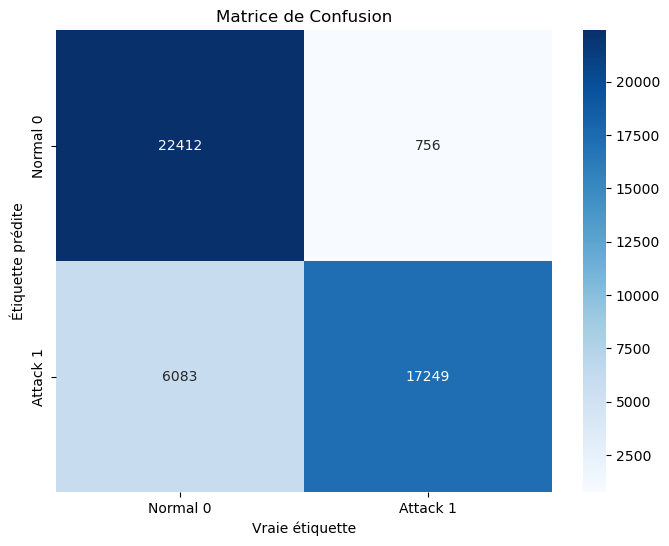

In [36]:

cm = confusion_matrix(Y_test,pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal 0', 'Attack 1'], 
            yticklabels=['Normal 0', 'Attack 1'])
plt.xlabel('Vraie étiquette')
plt.ylabel('Étiquette prédite')
plt.title('Matrice de Confusion')
plt.show()

In [37]:
# Créer une instance du modèle KNN avec le nombre de voisins souhaité (par exemple, 5 voisins)
model_knn = KNeighborsClassifier(n_neighbors=20)


# Entraîner le modèle KNN sur les données d'entraînement
start_time = time.time()
model_knn.fit(X_train, Y_train)
end_time = time.time()
print("Training time: ", end_time - start_time)

# Prédire les étiquettes de classe pour les données de test en utilisant le modèle KNN
start_time = time.time()
Y_test_pred_knn = model_knn.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time - start_time)

# Afficher les scores d'exactitude (accuracy) pour les données d'entraînement et de test
print(classification_report(Y_test,Y_test_pred_knn))

Training time:  0.02198624610900879
Testing time:  32.17161011695862
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     23168
           1       0.91      0.83      0.87     23332

    accuracy                           0.88     46500
   macro avg       0.88      0.88      0.88     46500
weighted avg       0.88      0.88      0.88     46500



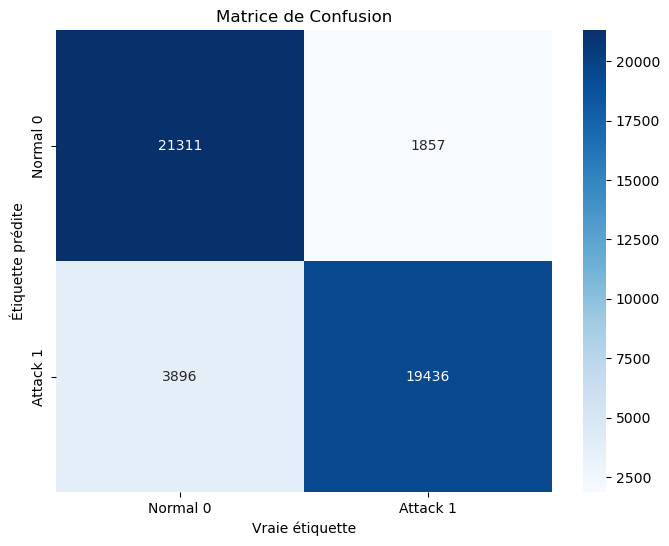

In [38]:
# Supposons que Y_test soit vos vraies étiquettes et Y_test_pred_knn soit vos prédictions

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, Y_test_pred_knn)

# Afficher la matrice de confusion en utilisant seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal 0', 'Attack 1'], 
            yticklabels=['Normal 0', 'Attack 1'])
plt.xlabel('Vraie étiquette')
plt.ylabel('Étiquette prédite')
plt.title('Matrice de Confusion')
plt.show()

# Grid search

# KNN

In [39]:
#param_grid_knn = {'n_neighbors':np.arange(1,50), 'metric':['euclidean','manhattan'], 'weights':['uniform', 'distance'],
#                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
#                }

#grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

#grid.fit(X2_train,y2_train)

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid_knn =param_grid_knn = {
    'algorithm': ['auto'],
    'metric': ['euclidean'],
    'n_neighbors': [23],
    'weights': ['distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)

grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'metric': ['euclidean'],
                         'n_neighbors': [23], 'weights': ['distance']})

In [41]:
grid.best_score_ # le modèle qui obteni le meilleur score 

0.8842724014336918

In [42]:
grid.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 23,
 'weights': 'distance'}

In [43]:
KNN_classification=KNeighborsClassifier(algorithm= 'auto',
 metric= 'euclidean',
 n_neighbors= 23,
 weights= 'distance')
# train model
KNN_Grid = KNN_classification.fit(X_train, Y_train)
# predict the model using 'X_test'
KNN_Grid_pred = KNN_Grid.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,KNN_Grid_pred))
print(classification_report(Y_test, KNN_Grid_pred))

[[21101  2067]
 [ 3113 20219]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     23168
           1       0.91      0.87      0.89     23332

    accuracy                           0.89     46500
   macro avg       0.89      0.89      0.89     46500
weighted avg       0.89      0.89      0.89     46500



In [45]:
from sklearn.metrics import f1_score,matthews_corrcoef,accuracy_score
f1_KNN= f1_score(Y_test,KNN_Grid_pred, average='micro')
print('F1:',f1_KNN)
print('Accuracy :',accuracy_score(Y_test,KNN_Grid_pred))

F1: 0.8886021505376344
Accuracy : 0.8886021505376344


## Decision Tree

In [46]:
# 'criterion': La fonction pour mesurer la qualité de split
# 'max_depth': La profondeur maximale de l’arbre
max_depth = np.arange(1,10)
param_grid={"criterion": ["gini", "entropy"],"max_depth": max_depth}

In [47]:
decision_tree_Gridsearch = DecisionTreeClassifier()
decision_tree_Gridsearch = GridSearchCV(decision_tree_Gridsearch, param_grid, cv=5)
decision_tree_Gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [48]:
decision_tree_Gridsearch.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [49]:
# instantier l'object 'DecisionTreeClassifier'  utilisation  criterion max_depth
decision_tree_classification = DecisionTreeClassifier(
criterion= 'entropy', max_depth= 9)
# train model
decision_tree_Grid = decision_tree_classification.fit(X_train, Y_train)
# predict the model using 'X_test'
decision_tree_Grid_pred = decision_tree_Grid.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, decision_tree_Grid_pred))
print(classification_report(Y_test,decision_tree_Grid_pred))

[[22624   544]
 [ 3233 20099]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     23168
           1       0.97      0.86      0.91     23332

    accuracy                           0.92     46500
   macro avg       0.92      0.92      0.92     46500
weighted avg       0.92      0.92      0.92     46500



In [51]:
f1_DT= f1_score(Y_test,decision_tree_Grid_pred, average='micro')
print('F1:',f1_DT)

F1: 0.9187741935483871


# Comparaison entre les modèles

In [52]:
models = ['DT','KNN']
F1_scores = [f1_DT,f1_KNN]
print("Models\tAccuracy\n")
for i in range(2):
    print(str(models[i]) + "\t" + str(F1_scores[i]),end='\n')

Models	Accuracy

DT	0.9187741935483871
KNN	0.8886021505376344



------------>Nous décidons à partir du graphique à barres que le meilleur modèle est Decision Tree<------------


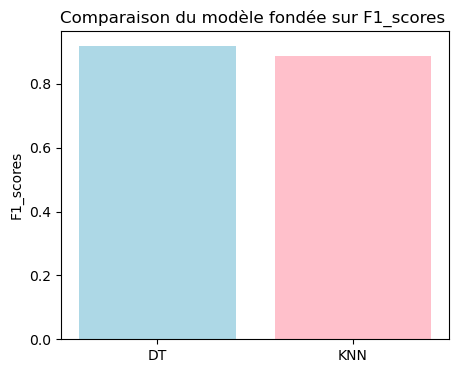

In [53]:
#------------>Trouver le meillleur algorithme utilisant f1-score<----------
print("\n------------>Nous décidons à partir du graphique à barres que le meilleur modèle est Decision Tree<------------")
plt.rcParams['figure.figsize'] = (5,4)
plt.bar(models, F1_scores, color=['lightblue', 'pink', 'lightgreen', 'cyan','red','yellow','purple','orange','brown'])
plt.ylabel("F1_scores")
plt.title("Comparaison du modèle fondée sur F1_scores ")
plt.show()

In [54]:
#appliquer Decision Tree sur notre dataset
classifier= DecisionTreeClassifier(criterion= 'entropy', max_depth= 9)
classifier.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [55]:
import pickle

In [56]:
#enregestrer le modele
pickle.dump(classifier,open('model.pkl','wb'))